# Demo

1. https://www.onlinegdb.com/

# Details

1. 背包问题 (Knapsack Problem)

一个旅行者随身携带一个背包，可以放入背包的物品有 n 种，每种物品的重量和价值分别是 $w_{i}$ , $v_j$, $i = 1$, ... , n 。

如果背包的最大容量限制是 b，怎样选择放入背包的物品以使得背包的价值最大 ?

2. 投资问题

设有 m 元钱, n 项投资， 函数 $f_{i}(x)$ 表示将 x 元钱投入到第 i 项项目所产生的效益， i=1 ,... , n。

问:如何分配这 m 元钱，使得投资的总效益最高?

## Reference

1. https://blog.csdn.net/qq_41580347/article/details/111016310

2. https://www.cxymm.net/article/qq_41580347/111016310

3. https://web.ntnu.edu.tw/~algo/KnapsackProblem.html

4. https://www.coursera.org/lecture/algorithms/040tou-zi-wen-ti-MbJJj

5. https://leetcode.com/discuss/study-guide/1152328/01-Knapsack-Problem-and-Dynamic-Programming

6. https://leetcode.com/problems/word-break/discuss/1702338/dynamic-programming-knapsack-problem-python-3

7. https://blog.csdn.net/littleshi00/article/details/105397192

8. https://icode.best/i/18557543908876


# 1. 背包问题 (Knapsack Problem)

>
> 一个旅行者随身携带一个背包，可以放入背包的物品有 n 种，每种物品的重量和价值分别是 $w_{i}$ , $v_j$, $i = 1$, ... , n 。
>
> 如果背包的最大容量限制是 b，怎样选择放入背包的物品以使得背包的价值最大 ?
>


0/1 背包是動態規劃研究的重要問題，因為它提供了許多有用的見解。

語句：給定一組從 1 到 n 編號的 n 個物品，每個物品都有一個重量 wi 和一個值 vi，以及最大重量容量 W，最大化背包中物品的值的總和，使得重量小於或等於背包的容量。

## 天真的解決方案：

讓我們看看天真的解決方案 - 每個項目只有 2 個選擇，要么包含在背包中，要么忽略該項目。
如果包含項目，則通過減少容量 W - vi 並累積項目值來檢查剩餘項目 (N - 1)。否則，在容量和價值不變的情況下檢查剩餘項目 (N - 1)。同樣，下一個項目將有兩個選擇。如果您將其可視化為樹，它將類似於下面的決策樹：

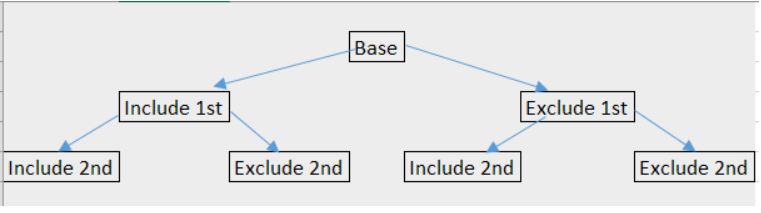

每個級別 d 有 $2^d$ 個選項，有 N 個項目，因此復雜度為 $2^N$。

另一種將每個項目視為位的方法，然後我們檢查設置和取消設置的所有可能組合，並找到在滿足權重約束時獲得的最大值。很明顯，我們需要檢查 (1 << n) 或 $2^N$ 次迭代。所以，天真的解決方案是 $2^N$。

## 表格法：

考慮一個非常簡單的例子 - 權重 = {1, 2, 3} 和值 ={6, 10, 12}，我們有容量為 5 的背包。

現在，讓我們使用表格方法實現相同的功能

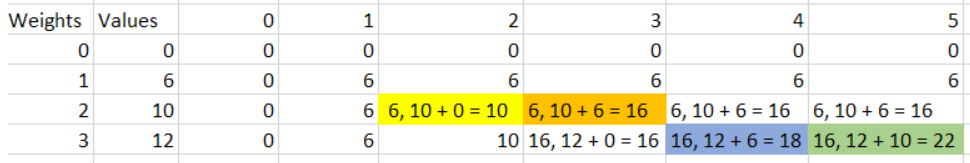

在列上，我們將容量從 0 增加到 W，即最大容量從 0 增加到 5。在每一行上，我們考慮項目，我們注意到它的權重和值。對於每一行，我們只考慮前幾行中考慮的項目，對於每一列，我們考慮那麼多容量。基本情況是重量為 0（無物品），無論容量如何，值都是 0，同樣，如果容量為 0，那麼我們不能放置任何物品，因此值將為 0。

第一行（權重為 1 的行）很簡單，我們的權重為 1，因此我們可以從容量 1 填充它的值。因為只有整行才會有值 6

對於第二行，現在權重為 2，我們可以將與其上方行相同的值填充到容量 2。對於容量 2，它將是 2 選擇 - 包括或排除當前項目。如果我們排除當前項目，則值將與最上面的第 6 行相同。如果我們包括，則值將是 = 當前值 (10) + d(1，當前容量 (2) - 重量(2)) = 10 + d( 1, 2- 2) = 10 + 0 = 10。最大值為 10，因此結果為 10。現在，d 函數是前一項 (1)，零權重 = 0。
這就是我們得到公式的方式：

```
d(i, w) = Math.Max( d(i - 1, w), d(i - 1, w - weight[i]) + value[i])
```


考慮第 3 行和容量 4，不包括第 3 項，我們從上面的行得到 16 個值，包括它我們發現值 = 12 + d(2, 1) = 12 + 6 = 18。

很明顯，我們對每個容量 0 到 W 和每個項目 0 到 N 只計算一次，所以復雜度是 O(NW)。

參考代碼：

```
// given N, maxWeight, weights and values
long[,] d = new long[N + 1, maxWeight + 1];

for (long i = 0; i < N; i++)
{
	for (long w = 0; w <= maxWeight; w++)
	{                    
		if (weights[i] <= w)
		{
			// Exclude or include
			d[i + 1, w] = Math.Max(d[i, w], d[i, w - weights[i]] + values[i]);
		}

		else
		{
			// Exclude
			d[i + 1, w] = d[i, w];
		}                    
	}
}
```

等等，我們如何將時間複雜度從 O(2 ^ N) 提高到 O(N * W)？

這是因為我們重用了已經計算好的解決方案。例如，如果容量 = 7，而不是嘗試不同的項目組合，如 4 + 3、2 + 5、1 + 6、2 + 4 等。我們只做一個計算來排除或包含當前項目。當我們包含當前項目時，我們正在重用已發現容量減少和項目更少的解決方案。

許多動態規劃問題遵循類似的模式，例如

- 1. 我們有優化功能 - 最大化價值，最小化距離等

- 2. 最優子結構 - 遞歸地找到子問題的最優解

- 3. 重疊子問題 - 相同的子問題一次又一次地解決。

動態編程解決每個子問題一次並重用結果。有兩種方法：

1. 自上而下：在子問題的遞歸計算過程中，我們存儲結果，所以當我們再次嘗試子問題時，我們直接使用存儲的結果而不是重新計算。因此，結果應該以可以在 O(1) 時間內檢索到的方式存儲 - 就像使用數組/字典一樣。

2. 自下而上：這裡我們嘗試解決較小的子問題，例如上面的項目和容量，然後到達更大的問題。更大的子問題的解決方案是通過使用已經計算的子問題的解決方案來生成的。

無論哪種情況，我們都需要找出子問題建立的狀態。例如，考慮的項目和剩餘容量是我們的狀態，無論剩餘的項目數量和相同 i 和 w 的總容量如何，我們都具有相同的值。識別狀態對於動態規劃至關重要。


In [1]:
from typing import List

def wordBreak(self, s: str, wordDict: List[str]) -> bool:
        bagSize = len(s)+1
        itemSize = len(wordDict)
        dp = [False] * bagSize
        dp[0] = True
        # 排列而不是组合。 外遍历中的背包。
        # 允许重叠物品，背包溯源应从小值开始。
        # 当我们同时遇到一个 True 时中断
        # Permutation instead of combination. knapsack in outer traversal。
        # Allowed overlapping items，tracersal of knapsack should start with small value。
        # break when we meet a True at once
        for j in range(1, bagSize):
            for i in range(itemSize):
                if j-len(wordDict[i])>=0 and dp[j-len(wordDict[i])] and wordDict[i]==s[j-len(wordDict[i]):j]:                    
                    dp[j] = True
                    break
        return dp[-1]

# 2. 投资问题


>
> 设有 m 元钱, n 项投资， 函数 $f_{i}(x)$ 表示将 x 元钱投入到第 i 项项目所产生的效益， i=1 ,... , n。
>
> 问:如何分配这 m 元钱，使得投资的总效益最高?
>

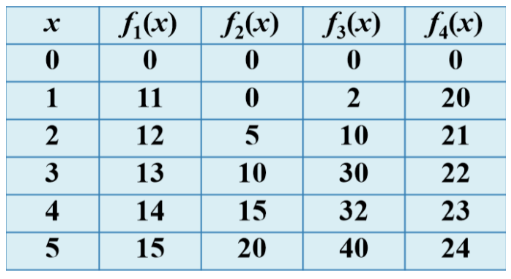



## 暴力求解

算法思想为对所有项目进行循环，通过限定条件：总投资金额 = y，得到所有符合的答案，从中选取最大值，即为所求。

### C++

```{c}
#include<iostream>
using namespace std;
    //投资问题的暴力解法
int main(){
    int profitMatrix[4][6]={0,11,12,13,14,15,   //收益矩阵
                            0,0,5,10,15,20,
                            0,2,10,30,32,40,
                            0,20,21,22,23,24
    };
    int x1,x2,x3,x4,x;
    int sum=0,maxProfit=0;
    int a[4]={0}; //输出最优向量
    for(x1=0;x1<6;x1++){
        for(x2=0;x2<6;x2++){
            for(x3=0;x3<6;x3++){
                for(x4=0;x4<6;x4++){
                   x=x1+x2+x3+x4;
                   if(x==5){ //限定条件，投资5万元
                        sum=profitMatrix[0][x1]+profitMatrix[1][x2]+
                            profitMatrix[2][x3]+profitMatrix[3][x4];
                        if(sum>maxProfit){
                            maxProfit=sum;
                            a[0]=x1;
                            a[1]=x2;
                            a[2]=x3;
                            a[3]=x4;
                        }
                   }
                }
            }
        }
    }
    cout<<"最大利润为："<<maxProfit<<endl;
    cout<<"最优投资方案为：( ";
    for(int i=0;i<4;i++){
        cout<<a[i]<<" ";
    }
    cout<<")";
}
```

### Python

In [2]:
if __name__ == '__main__':
    profitMatrix=[[0,11,12,13,14,15],
                  [0,0,5,10,15,20],
                  [0,2,10,30,32,40],
                  [0,20,21,22,23,24]]
    a=[0,0,0,0] #存放最优投资方案
    maxProfit=0
    sumMoney=0
    for x1 in range(6):
        for x2 in range(6):
            for x3 in range(6):
                for x4 in range(6):
                    x=x1+x2+x3+x4
                    if x==5:
                        sumMoney=profitMatrix[0][x1]+profitMatrix[1][x2]+profitMatrix[2][x3]+profitMatrix[3][x4]
                    if sumMoney>maxProfit:
                        maxProfit=sumMoney
                        a[0]=x1
                        a[1]=x2
                        a[2]=x3
                        a[3]=x4
    print("最大利润为："+str(maxProfit))
    print("最优投资方案为："+str(a))

最大利润为：61
最优投资方案为：[1, 0, 3, 1]


## 动态规划

算法思想為假设第 x 个项目投资 m 万元，则将 x 个项目的 y 万元投资问题分解为前 x-1 个项目投资 y-m 万元和第 x 个项目投资 m 万元。这样就可以将问题规模减小，直至仅有一个项目，此时的最佳投资方案就是其本身。

令 outspace[x][y] 表示前 x 个项目投资 y 万元得到的最大利润，令

profitMatrix[i][m]=fi(m)，则动态方程为：

outspace[x][y]=profitMatrix[x][m]+outspace[x-1][y-m]

限定边界为 outspace[0][k]=profitMatrix[0][k]

### C++

```{c}
#include<iostream>
using namespace std;

int getProfit(int outspace[4][6],int profitMatrix[4][6],int maxProfit){
    for(int i=0;i<=5;i++){
    //当仅有一个项目时，此项目的收益即为最优，分开赋值是为了避免下面出现 -1 行
        outspace[0][i]=profitMatrix[0][i];
    }
    for(int i=1;i<4;i++){ //逐次加入第2，3，4个项目
        for(int j=0;j<=5;j++){//投资金额
                for(int m=0;m<=j;m++){//m代表最后一个项目投资金额
                    if(outspace[i][j]<profitMatrix[i][m]+outspace[i-1][j-m]){
                        outspace[i][j]=profitMatrix[i][m]+outspace[i-1][j-m];
                        if(outspace[i][j]>maxProfit)
                            maxProfit=outspace[i][j];

                    }
                }
        }
    }
    return maxProfit;
}
int main()
{
    int maxProfit = 0;
    int outspace[4][6]={0};//初始化最大利润矩阵
    int profitMatrix[4][6]={0,11,12,13,14,15,   //收益矩阵
                            0,0,5,10,15,20,
                            0,2,10,30,32,40,
                            0,20,21,22,23,24
    };
    int a=getProfit(outspace,profitMatrix,maxProfit);
    cout<<"最大收益为："<<a<<endl;
    return 0;
}
```

### Python

In [3]:
def getProfit(profitMatrix,outspace,maxProfit):
    for i in range(6):
        outspace[0][i]=profitMatrix[0][i]
    for i in range(1,4):
        for j in range(6):
            for m in range(j+1):
                if outspace[i][j]<profitMatrix[i][m]+outspace[i-1][j-m]:
                    outspace[i][j]=profitMatrix[i][m]+outspace[i-1][j-m]
                if maxProfit<outspace[i][j]:
                    maxProfit=outspace[i][j]
    return maxProfit
                
if __name__ =='__main__':
    profitMatrix=[[0,11,12,13,14,15],
                  [0,0,5,10,15,20],
                  [0,2,10,30,32,40],
                  [0,20,21,22,23,24]]
    outspace=[]
    for i in range(4):
        outspace.append([])
        for j in range(6):
            outspace[i].append(0)
    maxProfit=0
    a=getProfit(profitMatrix,outspace,maxProfit)
    print("最大利润为："+str(a))

最大利润为：61
